In [2]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Настройки отображения pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("Библиотеки загружены успешно!")
print(f"Pandas версия: {pd.__version__}")
print(f"Numpy версия: {np.__version__}")

Библиотеки загружены успешно!
Pandas версия: 2.3.3
Numpy версия: 2.3.4


In [3]:
# Загрузка данных
prolongations = pd.read_csv('../data/prolongations.csv')
financial = pd.read_csv('../data/financial_data.csv')

print("Данные загружены!")
print(f"\nФайл prolongations.csv: {prolongations.shape[0]} строк, {prolongations.shape[1]} колонок")
print(f"Файл financial_data.csv: {financial.shape[0]} строк, {financial.shape[1]} колонок")

# Первые строки
print("\n=== Первые строки prolongations ===")
print(prolongations.head())
print("\n=== Первые строки financial ===")
print(financial.head())

Данные загружены!

Файл prolongations.csv: 477 строк, 3 колонок
Файл financial_data.csv: 451 строк, 19 колонок

=== Первые строки prolongations ===
    id        month                             AM
0   42  ноябрь 2022   Васильев Артем Александрович
1  453  ноябрь 2022   Васильев Артем Александрович
2  548  ноябрь 2022      Михайлов Андрей Сергеевич
3   87  ноябрь 2022  Соколова Анастасия Викторовна
4  429  ноябрь 2022  Соколова Анастасия Викторовна

=== Первые строки financial ===
    id        Причина дубля Ноябрь 2022 Декабрь 2022 Январь 2023 Февраль 2023  \
0   42                  NaN   36 220,00          NaN         NaN          NaN   
1  657  первая часть оплаты        стоп          NaN         NaN          NaN   
2  657  вторая часть оплаты        стоп          NaN         NaN          NaN   
3  594                  NaN        стоп          NaN         NaN          NaN   
4  665                  NaN   10 000,00          NaN         NaN          NaN   

  Март 2023 Апрель 2023 Ма

In [4]:
# Функция для преобразования сумм в числа
def clean_amount(value):
    """
    Преобразует строковые значения сумм в числа.
    'стоп', 'в ноль', NaN → 0
    '36 220,00' → 36220.0
    """
    if pd.isna(value):
        return 0
    if isinstance(value, (int, float)):
        return float(value)
    
    value = str(value).strip().lower()
    
    # Если стоп или в ноль - возвращаем 0
    if value in ['стоп', 'в ноль', '']:
        return 0
    
    # Убираем пробелы и заменяем запятую на точку
    value = value.replace(' ', '').replace(',', '.')
    
    try:
        return float(value)
    except:
        return 0

# Применяем к колонкам с месяцами
month_columns = [col for col in financial.columns if col not in ['id', 'Причина дубля', 'Account']]

print(f"Месяцы для обработки: {month_columns}")
print("\nПреобразование сумм...")

for col in month_columns:
    financial[col] = financial[col].apply(clean_amount)

print("✅ Суммы преобразованы в числовой формат!")
print("\n=== Первые строки после преобразования ===")
print(financial.head(10))

Месяцы для обработки: ['Ноябрь 2022', 'Декабрь 2022', 'Январь 2023', 'Февраль 2023', 'Март 2023', 'Апрель 2023', 'Май 2023', 'Июнь 2023', 'Июль 2023', 'Август 2023', 'Сентябрь 2023', 'Октябрь 2023', 'Ноябрь 2023', 'Декабрь 2023', 'Январь 2024', 'Февраль 2024']

Преобразование сумм...
✅ Суммы преобразованы в числовой формат!

=== Первые строки после преобразования ===
    id        Причина дубля  Ноябрь 2022  Декабрь 2022  Январь 2023  \
0   42                  NaN         0.00             0            0   
1  657  первая часть оплаты         0.00             0            0   
2  657  вторая часть оплаты         0.00             0            0   
3  594                  NaN         0.00             0            0   
4  665                  NaN         0.00             0            0   
5  637                  NaN         0.00             0            0   
6  419                  NaN         0.00             0            0   
7  578                  NaN         0.00             0        

In [5]:
# Перезагрузим данные чтобы посмотреть сырые значения
financial_raw = pd.read_csv('../data/financial_data.csv')

print("=== Проверка сырых данных ===")
print(financial_raw.loc[0:9, ['id', 'Ноябрь 2022', 'Декабрь 2022', 'Account']])

# Проверим типы данных
print("\n=== Типы данных колонок ===")
print(financial_raw.dtypes)

# Проверим несколько конкретных значений
print("\n=== Тест функции clean_amount ===")
test_values = ['36 220,00', 'стоп', 'в ноль', '10 000,00', None]
for val in test_values:
    print(f"{val} → {clean_amount(val)}")

=== Проверка сырых данных ===
    id Ноябрь 2022 Декабрь 2022                        Account
0   42   36 220,00          NaN   Васильев Артем Александрович
1  657        стоп          NaN   Васильев Артем Александрович
2  657        стоп          NaN   Васильев Артем Александрович
3  594        стоп          NaN   Васильев Артем Александрович
4  665   10 000,00          NaN   Васильев Артем Александрович
5  637   38 045,00          NaN  Соколова Анастасия Викторовна
6  419         NaN          NaN      Михайлов Андрей Сергеевич
7  578   82 800,00          NaN    Попова Екатерина Николаевна
8  579      в ноль          NaN   Васильев Артем Александрович
9  592   92 302,00          NaN   Васильев Артем Александрович

=== Типы данных колонок ===
id                int64
Причина дубля    object
Ноябрь 2022      object
Декабрь 2022     object
Январь 2023      object
Февраль 2023     object
Март 2023        object
Апрель 2023      object
Май 2023         object
Июнь 2023        object
Июль 202

In [6]:
# Перезагружаем данные
financial = pd.read_csv('../data/financial_data.csv')

print("До преобразования:")
print(financial.loc[0:4, ['id', 'Ноябрь 2022', 'Декабрь 2022']])

# Применяем функцию очистки
month_columns = [col for col in financial.columns if col not in ['id', 'Причина дубля', 'Account']]

for col in month_columns:
    financial[col] = financial[col].apply(clean_amount)

print("\n✅ После преобразования:")
print(financial.loc[0:9, ['id', 'Ноябрь 2022', 'Декабрь 2022', 'Январь 2023']])

# Проверим что суммы действительно числа
print(f"\nТип данных 'Ноябрь 2022': {financial['Ноябрь 2022'].dtype}")
print(f"Сумма всех отгрузок за Ноябрь 2022: {financial['Ноябрь 2022'].sum():,.2f}")

До преобразования:
    id Ноябрь 2022 Декабрь 2022
0   42   36 220,00          NaN
1  657        стоп          NaN
2  657        стоп          NaN
3  594        стоп          NaN
4  665   10 000,00          NaN

✅ После преобразования:
    id  Ноябрь 2022  Декабрь 2022  Январь 2023
0   42         0.00             0            0
1  657         0.00             0            0
2  657         0.00             0            0
3  594         0.00             0            0
4  665         0.00             0            0
5  637         0.00             0            0
6  419         0.00             0            0
7  578         0.00             0            0
8  579         0.00             0            0
9  592         0.00             0            0

Тип данных 'Ноябрь 2022': float64
Сумма всех отгрузок за Ноябрь 2022: 945.00


In [7]:
# Перезагружаем снова
financial = pd.read_csv('../data/financial_data.csv')

# Смотрим что именно в ячейке
test_value = financial.loc[0, 'Ноябрь 2022']
print(f"Значение: '{test_value}'")
print(f"Тип: {type(test_value)}")
print(f"Длина: {len(str(test_value))}")
print(f"Байты: {str(test_value).encode('utf-8')}")

# Попробуем разные варианты замены пробелов
def clean_amount_v2(value):
    if pd.isna(value):
        return 0
    if isinstance(value, (int, float)):
        return float(value)
    
    value = str(value).strip().lower()
    
    if value in ['стоп', 'в ноль', '']:
        return 0
    
    # Убираем ВСЕ виды пробелов (обычные, неразрывные и т.д.)
    import re
    value = re.sub(r'\s+', '', value)  # Удаляем все пробельные символы
    value = value.replace(',', '.')
    
    try:
        return float(value)
    except:
        return 0

# Тестируем
print(f"\nТест новой функции: {clean_amount_v2(test_value)}")

Значение: '36 220,00'
Тип: <class 'str'>
Длина: 9
Байты: b'36\xc2\xa0220,00'

Тест новой функции: 36220.0


In [8]:
import re

# Перезагружаем данные
financial = pd.read_csv('../data/financial_data.csv')

# Исправленная функция
def clean_amount(value):
    """Преобразует суммы в числа, убирая ВСЕ пробелы"""
    if pd.isna(value):
        return 0
    if isinstance(value, (int, float)):
        return float(value)
    
    value = str(value).strip().lower()
    
    if value in ['стоп', 'в ноль', '']:
        return 0
    
    # Убираем ВСЕ пробельные символы (включая неразрывные)
    value = re.sub(r'\s+', '', value)
    value = value.replace(',', '.')
    
    try:
        return float(value)
    except:
        return 0

# Применяем
month_columns = [col for col in financial.columns if col not in ['id', 'Причина дубля', 'Account']]

for col in month_columns:
    financial[col] = financial[col].apply(clean_amount)

print("✅ Данные очищены!")
print(financial.loc[0:9, ['id', 'Ноябрь 2022', 'Декабрь 2022', 'Январь 2023']])
print(f"\n💰 Общая сумма за Ноябрь 2022: {financial['Ноябрь 2022'].sum():,.2f} руб.")

✅ Данные очищены!
    id  Ноябрь 2022  Декабрь 2022  Январь 2023
0   42     36220.00          0.00         0.00
1  657         0.00          0.00         0.00
2  657         0.00          0.00         0.00
3  594         0.00          0.00         0.00
4  665     10000.00          0.00         0.00
5  637     38045.00          0.00         0.00
6  419         0.00          0.00         0.00
7  578     82800.00          0.00         0.00
8  579         0.00          0.00         0.00
9  592     92302.00          0.00         0.00

💰 Общая сумма за Ноябрь 2022: 11,995,886.86 руб.


In [9]:
# Объединяем дубли - суммируем все суммы по id проекта
print("До объединения дублей:", financial.shape)
print(f"Уникальных проектов: {financial['id'].nunique()}")

# Группируем по id и Account, суммируем все месяцы
financial_grouped = financial.groupby(['id', 'Account'], as_index=False)[month_columns].sum()

print(f"\n✅ После объединения дублей: {financial_grouped.shape}")
print(f"Уникальных проектов: {financial_grouped['id'].nunique()}")

print("\n=== Пример: проект 592 (был с дублями) ===")
print("До объединения:")
print(financial[financial['id'] == 592][['id', 'Причина дубля', 'Ноябрь 2022']])
print("\nПосле объединения:")
print(financial_grouped[financial_grouped['id'] == 592][['id', 'Ноябрь 2022', 'Account']])

# Используем объединенные данные дальше
financial = financial_grouped

До объединения дублей: (451, 19)
Уникальных проектов: 314

✅ После объединения дублей: (314, 18)
Уникальных проектов: 314

=== Пример: проект 592 (был с дублями) ===
До объединения:
     id        Причина дубля  Ноябрь 2022
9   592  первая часть оплаты     92302.00
10  592  вторая часть оплаты     12340.00

После объединения:
     id  Ноябрь 2022                       Account
97  592    104642.00  Васильев Артем Александрович


In [10]:
# Объединяем financial с prolongations
# Account из financial приоритетнее чем AM из prolongations
data = financial.merge(prolongations[['id', 'month']], on='id', how='left')

print(f"Данные объединены: {data.shape}")
print("\n=== Первые строки ===")
print(data.head(10))

# Проверим сколько проектов без информации о последнем месяце
missing_month = data['month'].isna().sum()
print(f"\nПроектов без информации о последнем месяце: {missing_month}")

# Посмотрим какие менеджеры у нас есть
managers = data['Account'].unique()
print(f"\nМенеджеры ({len(managers)}):")
for i, manager in enumerate(sorted(managers), 1):
    count = (data['Account'] == manager).sum()
    print(f"{i}. {manager} - {count} проектов")

Данные объединены: (478, 19)

=== Первые строки ===
   id                       Account  Ноябрь 2022  Декабрь 2022  Январь 2023  \
0  15       Иванова Мария Сергеевна    439280.00     439280.00    102433.75   
1  15       Иванова Мария Сергеевна    439280.00     439280.00    102433.75   
2  15       Иванова Мария Сергеевна    439280.00     439280.00    102433.75   
3  15       Иванова Мария Сергеевна    439280.00     439280.00    102433.75   
4  15       Иванова Мария Сергеевна    439280.00     439280.00    102433.75   
5  16       Иванова Мария Сергеевна         0.00          0.00         0.00   
6  31  Васильев Артем Александрович     55100.00      55100.00         0.00   
7  39   Попова Екатерина Николаевна    137700.00     137700.00    149206.50   
8  39   Попова Екатерина Николаевна    137700.00     137700.00    149206.50   
9  42  Васильев Артем Александрович     36220.00          0.00         0.00   

   Февраль 2023  Март 2023  Апрель 2023  Май 2023  Июнь 2023  Июль 2023  \
0  

In [13]:
# Посмотрим на проекты с множественными пролонгациями
project_counts = data.groupby('id').size().sort_values(ascending=False)
multiple_prolongations = project_counts[project_counts > 1]

print(f"Проектов с множественными пролонгациями: {len(multiple_prolongations)}")
print(f"Максимум пролонгаций одного проекта: {project_counts.max()}")

print("\n=== ТОП-5 проектов по количеству пролонгаций ===")
print(project_counts.head())

print("\n=== Пример: проект 15 (5 пролонгаций) ===")
print(data[data['id'] == 15][['id', 'Account', 'month', 'Январь 2023', 'Февраль 2023', 'Март 2023']])




Проектов с множественными пролонгациями: 99
Максимум пролонгаций одного проекта: 6

=== ТОП-5 проектов по количеству пролонгаций ===
id
633    6
154    6
15     5
112    5
798    5
dtype: int64

=== Пример: проект 15 (5 пролонгаций) ===
   id                  Account         month  Январь 2023  Февраль 2023  \
0  15  Иванова Мария Сергеевна  декабрь 2022    102433.75     102433.75   
1  15  Иванова Мария Сергеевна  февраль 2023    102433.75     102433.75   
2  15  Иванова Мария Сергеевна     март 2023    102433.75     102433.75   
3  15  Иванова Мария Сергеевна   апрель 2023    102433.75     102433.75   
4  15  Иванова Мария Сергеевна     июнь 2023    102433.75     102433.75   

   Март 2023  
0  102433.75  
1  102433.75  
2  102433.75  
3  102433.75  
4  102433.75  


In [14]:
# Создаем словарь для работы с месяцами
months_2023 = [
    'январь 2023', 'февраль 2023', 'март 2023', 'апрель 2023', 
    'май 2023', 'июнь 2023', 'июль 2023', 'август 2023',
    'сентябрь 2023', 'октябрь 2023', 'ноябрь 2023', 'декабрь 2023'
]

# Маппинг: название месяца → название колонки в таблице
month_to_column = {
    'январь 2023': 'Январь 2023',
    'февраль 2023': 'Февраль 2023',
    'март 2023': 'Март 2023',
    'апрель 2023': 'Апрель 2023',
    'май 2023': 'Май 2023',
    'июнь 2023': 'Июнь 2023',
    'июль 2023': 'Июль 2023',
    'август 2023': 'Август 2023',
    'сентябрь 2023': 'Сентябрь 2023',
    'октябрь 2023': 'Октябрь 2023',
    'ноябрь 2023': 'Ноябрь 2023',
    'декабрь 2023': 'Декабрь 2023'
}

# Функция для получения предыдущего месяца
def get_previous_month(month, shift=1):
    """Возвращает месяц, который был shift месяцев назад"""
    if month not in months_2023:
        return None
    idx = months_2023.index(month)
    if idx - shift < 0:
        return None
    return months_2023[idx - shift]

# Тест
print("=== Тест функции get_previous_month ===")
print(f"май 2023 - 1 месяц = {get_previous_month('май 2023', 1)}")
print(f"май 2023 - 2 месяца = {get_previous_month('май 2023', 2)}")
print(f"январь 2023 - 1 месяц = {get_previous_month('январь 2023', 1)}")

print(f"\n Готово! Будем анализировать {len(months_2023)} месяцев 2023 года")

=== Тест функции get_previous_month ===
май 2023 - 1 месяц = апрель 2023
май 2023 - 2 месяца = март 2023
январь 2023 - 1 месяц = None

 Готово! Будем анализировать 12 месяцев 2023 года


In [15]:
def calculate_prolongation_coefficients(data, target_month, manager=None):
    """
    Рассчитывает коэффициенты пролонгации K1 и K2 за конкретный месяц
    
    target_month: месяц для которого считаем (например, 'май 2023')
    manager: если указан - считаем только для этого менеджера, иначе для всех
    """
    # Фильтруем по менеджеру если указан
    df = data if manager is None else data[data['Account'] == manager]
    
    # Получаем названия колонок
    target_col = month_to_column.get(target_month)
    prev_month_1 = get_previous_month(target_month, 1)
    prev_month_2 = get_previous_month(target_month, 2)
    
    if not target_col or not prev_month_1 or not prev_month_2:
        return {'K1': None, 'K2': None, 'details': 'Недостаточно данных'}
    
    prev_col_1 = month_to_column[prev_month_1]
    prev_col_2 = month_to_column[prev_month_2]
    
    # K1: проекты завершились 1 месяц назад
    finished_1m_ago = df[df['month'] == prev_month_1]
    
    # Отгрузка всех завершившихся за их последний месяц
    base_amount_k1 = finished_1m_ago[prev_col_1].sum()
    
    # Отгрузка пролонгированных в текущем месяце
    prolonged_k1 = finished_1m_ago[finished_1m_ago[target_col] > 0]
    prolonged_amount_k1 = prolonged_k1[target_col].sum()
    
    K1 = prolonged_amount_k1 / base_amount_k1 if base_amount_k1 > 0 else 0
    
    # K2: проекты завершились 2 месяца назад
    finished_2m_ago = df[df['month'] == prev_month_2]
    
    # Из них берем только те, у которых НЕТ отгрузки 1 месяц назад
    not_prolonged_first = finished_2m_ago[finished_2m_ago[prev_col_1] == 0]
    
    # Отгрузка за их последний месяц
    base_amount_k2 = not_prolonged_first[prev_col_2].sum()
    
    # Отгрузка пролонгированных во 2й месяц
    prolonged_k2 = not_prolonged_first[not_prolonged_first[target_col] > 0]
    prolonged_amount_k2 = prolonged_k2[target_col].sum()
    
    K2 = prolonged_amount_k2 / base_amount_k2 if base_amount_k2 > 0 else 0
    
    return {
        'K1': K1,
        'K2': K2,
        'K1_base': base_amount_k1,
        'K1_prolonged': prolonged_amount_k1,
        'K2_base': base_amount_k2,
        'K2_prolonged': prolonged_amount_k2
    }

# Тест функции
print("=== Тест расчета за май 2023 для всего отдела ===")
result = calculate_prolongation_coefficients(data, 'май 2023')
print(f"K1 = {result['K1']:.2%}")
print(f"K2 = {result['K2']:.2%}")
print(f"\nДетали K1: {result['K1_prolonged']:,.2f} / {result['K1_base']:,.2f}")
print(f"Детали K2: {result['K2_prolonged']:,.2f} / {result['K2_base']:,.2f}")

=== Тест расчета за май 2023 для всего отдела ===
K1 = 60.16%
K2 = 0.00%

Детали K1: 2,194,460.75 / 3,647,436.50
Детали K2: 0.00 / 1,796,703.80


In [18]:
# Рассчитываем для всех месяцев 2023 и всех менеджеров
results = []

# Список менеджеров (исключаем "без А/М")
managers_list = [m for m in data['Account'].unique() if m != 'без А/М']

print("Расчет коэффициентов...")
print("=" * 60)

# Для каждого месяца
for month in months_2023:
    # Для всего отдела
    dept_result = calculate_prolongation_coefficients(data, month)
    
    # Проверяем что результат корректный
    if dept_result['K1'] is not None:
        results.append({
            'Месяц': month,
            'Менеджер': 'ВЕСЬ ОТДЕЛ',
            'K1': dept_result['K1'],
            'K2': dept_result['K2'],
            'K1_база': dept_result['K1_base'],
            'K1_пролонг': dept_result['K1_prolonged'],
            'K2_база': dept_result['K2_base'],
            'K2_пролонг': dept_result['K2_prolonged']
        })
        
        # Для каждого менеджера
        for manager in managers_list:
            mgr_result = calculate_prolongation_coefficients(data, month, manager)
            results.append({
                'Месяц': month,
                'Менеджер': manager,
                'K1': mgr_result['K1'],
                'K2': mgr_result['K2'],
                'K1_база': mgr_result['K1_base'],
                'K1_пролонг': mgr_result['K1_prolonged'],
                'K2_база': mgr_result['K2_base'],
                'K2_пролонг': mgr_result['K2_prolonged']
            })
    else:
        print(f" Пропускаем {month}: {dept_result['details']}")

# Создаем DataFrame с результатами
results_df = pd.DataFrame(results)

print(f"\n Рассчитано {len(results_df)} строк")
print(f"   - Месяцев с данными: {results_df['Месяц'].nunique()}")
print(f"   - {len(managers_list)} менеджеров + отдел в целом")

print("\n=== Пример результатов (май 2023) ===")
may_results = results_df[results_df['Месяц'] == 'май 2023'].copy()
may_results['K1_%'] = may_results['K1'] * 100
may_results['K2_%'] = may_results['K2'] * 100
print(may_results[['Менеджер', 'K1_%', 'K2_%', 'K1_база', 'K1_пролонг']].to_string(index=False))

Расчет коэффициентов...
 Пропускаем январь 2023: Недостаточно данных
 Пропускаем февраль 2023: Недостаточно данных

 Рассчитано 100 строк
   - Месяцев с данными: 10
   - 9 менеджеров + отдел в целом

=== Пример результатов (май 2023) ===
                     Менеджер   K1_%  K2_%    K1_база  K1_пролонг
                   ВЕСЬ ОТДЕЛ  60.16  0.00 3647436.50  2194460.75
      Иванова Мария Сергеевна  78.15  0.00  176790.50   138158.00
 Васильев Артем Александрович  51.46  0.00 2199365.00  1131823.00
  Попова Екатерина Николаевна  59.34  0.00  286090.00   169775.00
  Смирнова Ольга Владимировна  70.28  0.00  130661.00    91825.00
     Кузнецов Михаил Иванович 108.59  0.00   29795.00    32355.00
    Михайлов Андрей Сергеевич 133.08  0.00  241780.00   321769.75
Соколова Анастасия Викторовна  52.96  0.00  582955.00   308755.00
   Федорова Марина Васильевна   0.00  0.00       0.00        0.00
      Петрова Анна Дмитриевна   0.00  0.00       0.00        0.00


In [19]:
# Рассчитываем годовые коэффициенты (агрегируем все месяцы)
yearly_results = []

# Для всего отдела
dept_yearly = results_df[results_df['Менеджер'] == 'ВЕСЬ ОТДЕЛ']
yearly_k1 = dept_yearly['K1_пролонг'].sum() / dept_yearly['K1_база'].sum() if dept_yearly['K1_база'].sum() > 0 else 0
yearly_k2 = dept_yearly['K2_пролонг'].sum() / dept_yearly['K2_база'].sum() if dept_yearly['K2_база'].sum() > 0 else 0

yearly_results.append({
    'Менеджер': 'ВЕСЬ ОТДЕЛ',
    'K1_годовой': yearly_k1,
    'K2_годовой': yearly_k2,
    'K1_база_год': dept_yearly['K1_база'].sum(),
    'K1_пролонг_год': dept_yearly['K1_пролонг'].sum(),
    'K2_база_год': dept_yearly['K2_база'].sum(),
    'K2_пролонг_год': dept_yearly['K2_пролонг'].sum()
})

# Для каждого менеджера
for manager in managers_list:
    mgr_yearly = results_df[results_df['Менеджер'] == manager]
    yearly_k1 = mgr_yearly['K1_пролонг'].sum() / mgr_yearly['K1_база'].sum() if mgr_yearly['K1_база'].sum() > 0 else 0
    yearly_k2 = mgr_yearly['K2_пролонг'].sum() / mgr_yearly['K2_база'].sum() if mgr_yearly['K2_база'].sum() > 0 else 0
    
    yearly_results.append({
        'Менеджер': manager,
        'K1_годовой': yearly_k1,
        'K2_годовой': yearly_k2,
        'K1_база_год': mgr_yearly['K1_база'].sum(),
        'K1_пролонг_год': mgr_yearly['K1_пролонг'].sum(),
        'K2_база_год': mgr_yearly['K2_база'].sum(),
        'K2_пролонг_год': mgr_yearly['K2_пролонг'].sum()
    })

yearly_df = pd.DataFrame(yearly_results)
yearly_df['K1_%'] = yearly_df['K1_годовой'] * 100
yearly_df['K2_%'] = yearly_df['K2_годовой'] * 100

print("=== ГОДОВЫЕ КОЭФФИЦИЕНТЫ ПРОЛОНГАЦИИ 2023 ===\n")
print(yearly_df[['Менеджер', 'K1_%', 'K2_%', 'K1_база_год', 'K1_пролонг_год']].to_string(index=False))

=== ГОДОВЫЕ КОЭФФИЦИЕНТЫ ПРОЛОНГАЦИИ 2023 ===

                     Менеджер   K1_%  K2_%  K1_база_год  K1_пролонг_год
                   ВЕСЬ ОТДЕЛ  54.29  6.63  25826784.87     14022053.43
      Иванова Мария Сергеевна  31.42  3.06   1949468.95       612578.63
 Васильев Артем Александрович  42.45  4.61   8604648.90      3652919.00
  Попова Екатерина Николаевна  51.44 15.77   3028746.08      1558060.80
  Смирнова Ольга Владимировна  73.73 25.32   2971803.59      2191206.50
     Кузнецов Михаил Иванович  66.84 23.25   1454394.15       972103.81
    Михайлов Андрей Сергеевич  45.12  0.00   1759979.68       794179.75
Соколова Анастасия Викторовна  69.01  0.00   5881251.52      4058512.42
   Федорова Марина Васильевна  93.65  0.00     78000.00        73050.00
      Петрова Анна Дмитриевна 111.12  0.00     98492.00       109442.52


In [22]:
from openpyxl import Workbook
from openpyxl.styles import Font, PatternFill, Alignment
from openpyxl.utils.dataframe import dataframe_to_rows

# Создаем Excel файл
wb = Workbook()

# Удаляем стандартный лист
if 'Sheet' in wb.sheetnames:
    wb.remove(wb['Sheet'])

print("Создание Excel отчета...")
print("=" * 60)

# Лист 1: Сводка по годовым коэффициентам
ws1 = wb.create_sheet('Годовые коэффициенты')

# Заголовок
ws1['A1'] = 'ГОДОВЫЕ КОЭФФИЦИЕНТЫ ПРОЛОНГАЦИИ 2023'
ws1['A1'].font = Font(size=14, bold=True)
ws1.merge_cells('A1:G1')

# Данные
yearly_report = yearly_df[['Менеджер', 'K1_%', 'K2_%', 'K1_база_год', 'K1_пролонг_год', 'K2_база_год', 'K2_пролонг_год']].copy()
yearly_report.columns = ['Менеджер', 'K1 (%)', 'K2 (%)', 'База K1 (руб)', 'Пролонг K1 (руб)', 'База K2 (руб)', 'Пролонг K2 (руб)']

for r_idx, row in enumerate(dataframe_to_rows(yearly_report, index=False, header=True), 3):
    for c_idx, value in enumerate(row, 1):
        cell = ws1.cell(row=r_idx, column=c_idx, value=value)
        
        # Заголовки
        if r_idx == 3:
            cell.font = Font(bold=True, color='FFFFFF')
            cell.fill = PatternFill(start_color='366092', end_color='366092', fill_type='solid')
        
        # Строка "ВЕСЬ ОТДЕЛ"
        if r_idx > 3 and value == 'ВЕСЬ ОТДЕЛ':
            for col in range(1, 8):
                ws1.cell(row=r_idx, column=col).fill = PatternFill(start_color='FFC000', end_color='FFC000', fill_type='solid')
                ws1.cell(row=r_idx, column=col).font = Font(bold=True)
        
        cell.alignment = Alignment(horizontal='center', vertical='center')

# Устанавливаем ширину колонок
ws1.column_dimensions['A'].width = 35
ws1.column_dimensions['B'].width = 12
ws1.column_dimensions['C'].width = 12
ws1.column_dimensions['D'].width = 18
ws1.column_dimensions['E'].width = 20
ws1.column_dimensions['F'].width = 18
ws1.column_dimensions['G'].width = 20

print(" Лист 'Годовые коэффициенты' создан")

# Сохраняем
output_path = '../output/Отчет_пролонгации_2023.xlsx'
wb.save(output_path)
print(f"\n Отчет сохранен: {output_path}")

Создание Excel отчета...
 Лист 'Годовые коэффициенты' создан

 Отчет сохранен: ../output/Отчет_пролонгации_2023.xlsx


In [23]:
from openpyxl import load_workbook

# Загружаем существующий файл
wb = load_workbook(output_path)

# Лист 2: Помесячные коэффициенты
ws2 = wb.create_sheet('Помесячные коэффициенты')

# Заголовок
ws2['A1'] = 'ПОМЕСЯЧНЫЕ КОЭФФИЦИЕНТЫ ПРОЛОНГАЦИИ 2023'
ws2['A1'].font = Font(size=14, bold=True)
ws2.merge_cells('A1:H1')

# Подготовка данных для удобного просмотра
monthly_pivot = results_df.pivot_table(
    index='Менеджер',
    columns='Месяц',
    values='K1',
    aggfunc='first'
)

# Упорядочиваем месяцы
monthly_pivot = monthly_pivot[months_2023[2:]]  # с марта (первые 2 пропущены)

# Конвертируем в проценты
monthly_pivot = monthly_pivot * 100

# Переносим "ВЕСЬ ОТДЕЛ" наверх
if 'ВЕСЬ ОТДЕЛ' in monthly_pivot.index:
    dept_row = monthly_pivot.loc[['ВЕСЬ ОТДЕЛ']]
    other_rows = monthly_pivot.drop('ВЕСЬ ОТДЕЛ').sort_index()
    monthly_pivot = pd.concat([dept_row, other_rows])

# Записываем данные
ws2['A3'] = 'Менеджер / Месяц'
ws2['A3'].font = Font(bold=True, color='FFFFFF')
ws2['A3'].fill = PatternFill(start_color='366092', end_color='366092', fill_type='solid')

# Заголовки месяцев
for c_idx, month in enumerate(monthly_pivot.columns, 2):
    cell = ws2.cell(row=3, column=c_idx, value=month.upper())
    cell.font = Font(bold=True, color='FFFFFF')
    cell.fill = PatternFill(start_color='366092', end_color='366092', fill_type='solid')
    cell.alignment = Alignment(horizontal='center', vertical='center')

# Данные
for r_idx, (manager, row_data) in enumerate(monthly_pivot.iterrows(), 4):
    ws2.cell(row=r_idx, column=1, value=manager)
    
    for c_idx, value in enumerate(row_data, 2):
        cell = ws2.cell(row=r_idx, column=c_idx, value=value if pd.notna(value) else 0)
        cell.number_format = '0.00"%"'
        cell.alignment = Alignment(horizontal='center', vertical='center')
        
        # Цветовая шкала
        if pd.notna(value) and value > 0:
            if value >= 70:
                cell.fill = PatternFill(start_color='C6EFCE', end_color='C6EFCE', fill_type='solid')
            elif value >= 50:
                cell.fill = PatternFill(start_color='FFEB9C', end_color='FFEB9C', fill_type='solid')
            elif value > 0:
                cell.fill = PatternFill(start_color='FFC7CE', end_color='FFC7CE', fill_type='solid')
    
    # Выделяем "ВЕСЬ ОТДЕЛ"
    if manager == 'ВЕСЬ ОТДЕЛ':
        ws2.cell(row=r_idx, column=1).font = Font(bold=True)

# Ширина колонок
ws2.column_dimensions['A'].width = 35
for col in range(2, 12):
    ws2.column_dimensions[chr(64 + col)].width = 14

wb.save(output_path)
print("Лист 'Помесячные коэффициенты' добавлен")
print(f" Отчет обновлен: {output_path}")

Лист 'Помесячные коэффициенты' добавлен
 Отчет обновлен: ../output/Отчет_пролонгации_2023.xlsx


In [24]:
# Загружаем файл снова
wb = load_workbook(output_path)

# Лист 3: Детальная статистика
ws3 = wb.create_sheet('Детальная статистика', 0)  # Вставляем первым листом

# Заголовок
ws3['A1'] = 'АНАЛИЗ ПРОЛОНГАЦИЙ 2023 - ДЕТАЛЬНАЯ СТАТИСТИКА'
ws3['A1'].font = Font(size=14, bold=True)
ws3.merge_cells('A1:D1')

# Общая информация
row = 3
ws3[f'A{row}'] = 'Общая информация:'
ws3[f'A{row}'].font = Font(bold=True, size=12)
row += 1

stats = [
    ['Всего проектов в анализе:', data['id'].nunique()],
    ['Всего пролонгаций:', len(data)],
    ['Период анализа:', '2023 год'],
    ['Месяцев в анализе:', len(months_2023) - 2],  # минус янв и фев
    ['Количество менеджеров:', len(managers_list)],
    ['', ''],
    ['Средний K1 по отделу:', f"{yearly_df[yearly_df['Менеджер']=='ВЕСЬ ОТДЕЛ']['K1_%'].values[0]:.2f}%"],
    ['Средний K2 по отделу:', f"{yearly_df[yearly_df['Менеджер']=='ВЕСЬ ОТДЕЛ']['K2_%'].values[0]:.2f}%"],
    ['', ''],
    ['Общая сумма базы K1:', f"{yearly_df[yearly_df['Менеджер']=='ВЕСЬ ОТДЕЛ']['K1_база_год'].values[0]:,.2f} руб"],
    ['Общая сумма пролонгаций K1:', f"{yearly_df[yearly_df['Менеджер']=='ВЕСЬ ОТДЕЛ']['K1_пролонг_год'].values[0]:,.2f} руб"],
]

for stat_row in stats:
    ws3[f'A{row}'] = stat_row[0]
    ws3[f'B{row}'] = stat_row[1]
    ws3[f'A{row}'].font = Font(bold=True)
    row += 1

# Рейтинг менеджеров
row += 2
ws3[f'A{row}'] = 'Рейтинг менеджеров по K1:'
ws3[f'A{row}'].font = Font(bold=True, size=12)
row += 1

# Заголовки
ws3[f'A{row}'] = 'Место'
ws3[f'B{row}'] = 'Менеджер'
ws3[f'C{row}'] = 'K1 (%)'
for col in ['A', 'B', 'C']:
    ws3[f'{col}{row}'].font = Font(bold=True, color='FFFFFF')
    ws3[f'{col}{row}'].fill = PatternFill(start_color='366092', end_color='366092', fill_type='solid')
row += 1

# Рейтинг
ranking = yearly_df[yearly_df['Менеджер'] != 'ВЕСЬ ОТДЕЛ'].sort_values('K1_%', ascending=False)
for rank, (idx, mgr_row) in enumerate(ranking.iterrows(), 1):
    ws3[f'A{row}'] = rank
    ws3[f'B{row}'] = mgr_row['Менеджер']
    ws3[f'C{row}'] = f"{mgr_row['K1_%']:.2f}%"
    
    # Медали для топ-3
    if rank == 1:
        ws3[f'A{row}'].fill = PatternFill(start_color='FFD700', end_color='FFD700', fill_type='solid')
    elif rank == 2:
        ws3[f'A{row}'].fill = PatternFill(start_color='C0C0C0', end_color='C0C0C0', fill_type='solid')
    elif rank == 3:
        ws3[f'A{row}'].fill = PatternFill(start_color='CD7F32', end_color='CD7F32', fill_type='solid')
    
    row += 1

# Ширина колонок
ws3.column_dimensions['A'].width = 35
ws3.column_dimensions['B'].width = 35
ws3.column_dimensions['C'].width = 15
ws3.column_dimensions['D'].width = 20

wb.save(output_path)
print(" Лист 'Детальная статистика' добавлен")
print(f" Финальный отчет: {output_path}")
print("\n EXCEL ОТЧЕТ ГОТОВ!")

 Лист 'Детальная статистика' добавлен
 Финальный отчет: ../output/Отчет_пролонгации_2023.xlsx

 EXCEL ОТЧЕТ ГОТОВ!


 График сохранен: ../output/Визуализация_пролонгаций.png


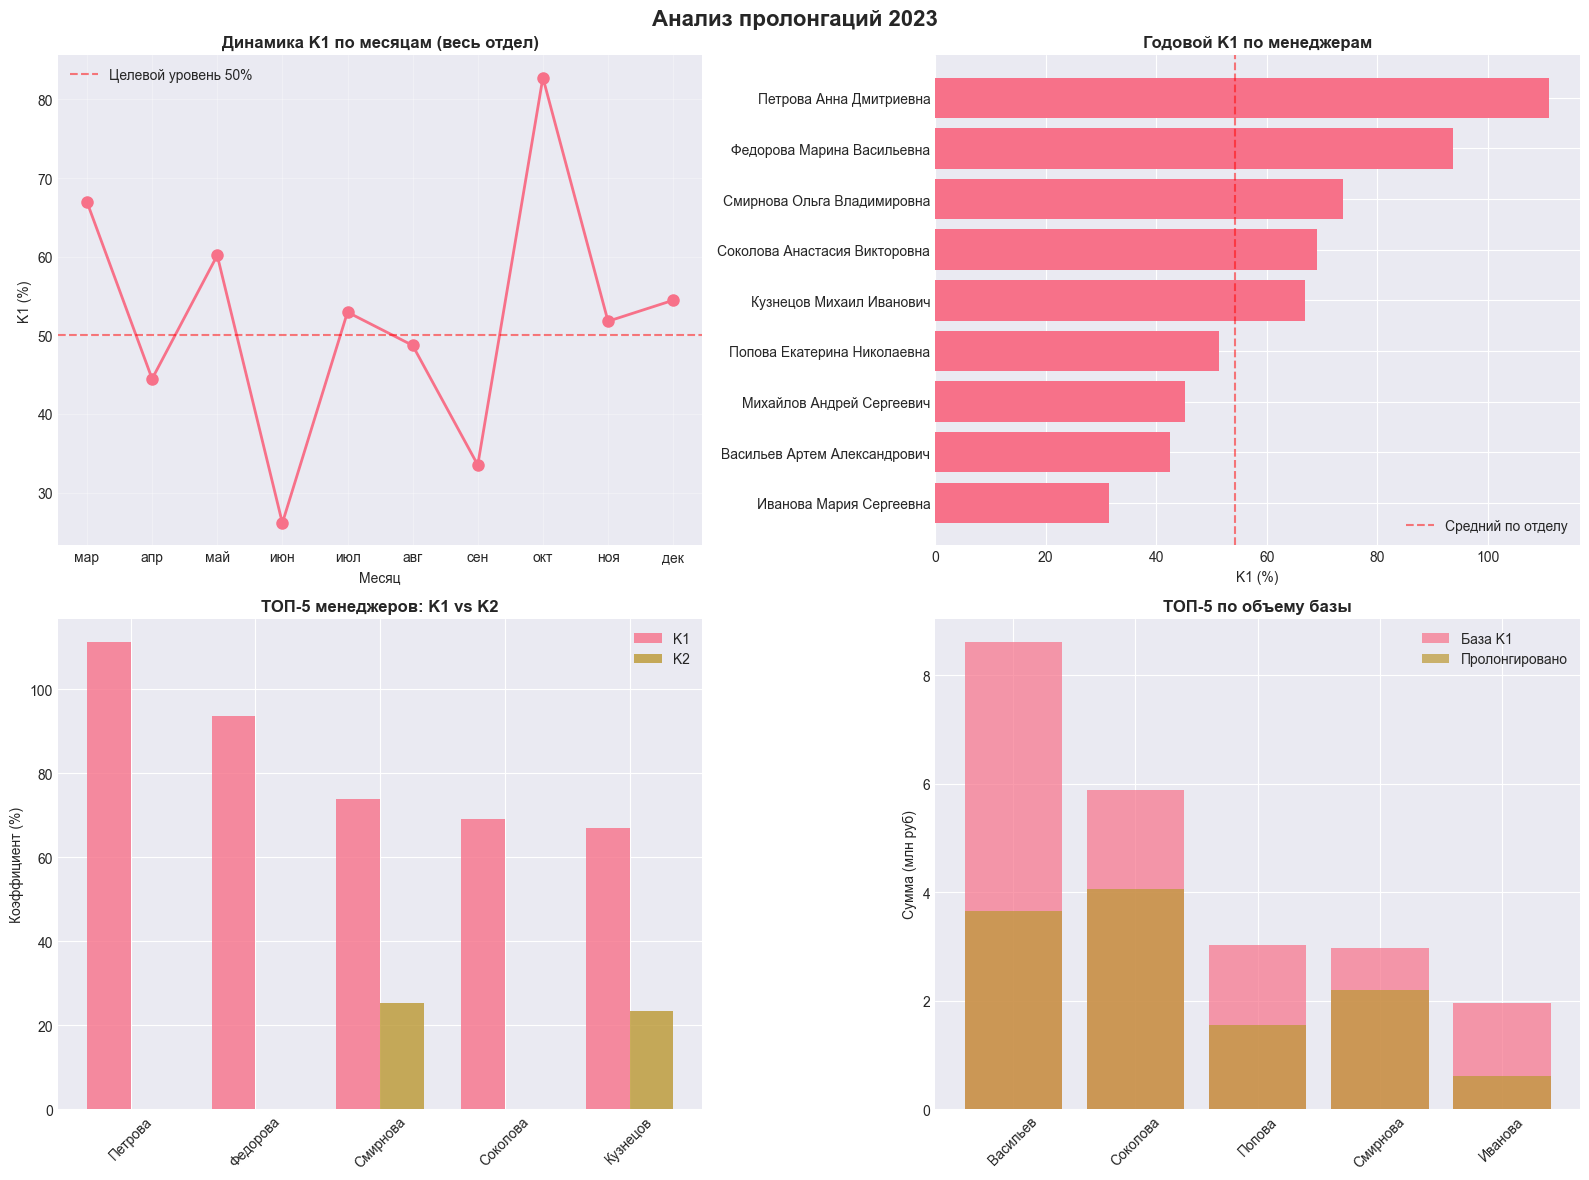

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Создаем фигуру с графиками
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Анализ пролонгаций 2023', fontsize=16, fontweight='bold')

# График 1: Динамика K1 по месяцам (весь отдел)
dept_monthly = results_df[results_df['Менеджер'] == 'ВЕСЬ ОТДЕЛ'].copy()
dept_monthly['Месяц_short'] = dept_monthly['Месяц'].str[:3]
axes[0, 0].plot(dept_monthly['Месяц_short'], dept_monthly['K1'] * 100, marker='o', linewidth=2, markersize=8)
axes[0, 0].set_title('Динамика K1 по месяцам (весь отдел)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Месяц')
axes[0, 0].set_ylabel('K1 (%)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axhline(y=50, color='r', linestyle='--', alpha=0.5, label='Целевой уровень 50%')
axes[0, 0].legend()

# График 2: Годовые коэффициенты по менеджерам
top_managers = yearly_df[yearly_df['Менеджер'] != 'ВЕСЬ ОТДЕЛ'].sort_values('K1_%', ascending=True)
axes[0, 1].barh(top_managers['Менеджер'], top_managers['K1_%'])
axes[0, 1].set_title('Годовой K1 по менеджерам', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('K1 (%)')
axes[0, 1].axvline(x=54.29, color='r', linestyle='--', alpha=0.5, label='Средний по отделу')
axes[0, 1].legend()

# График 3: Сравнение K1 и K2
comparison_data = yearly_df[yearly_df['Менеджер'] != 'ВЕСЬ ОТДЕЛ'].sort_values('K1_%', ascending=False).head(5)
x = range(len(comparison_data))
width = 0.35
axes[1, 0].bar([i - width/2 for i in x], comparison_data['K1_%'], width, label='K1', alpha=0.8)
axes[1, 0].bar([i + width/2 for i in x], comparison_data['K2_%'], width, label='K2', alpha=0.8)
axes[1, 0].set_title('ТОП-5 менеджеров: K1 vs K2', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Коэффициент (%)')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels([m.split()[0] for m in comparison_data['Менеджер']], rotation=45)
axes[1, 0].legend()

# График 4: Распределение базы и пролонгаций
top5 = yearly_df[yearly_df['Менеджер'] != 'ВЕСЬ ОТДЕЛ'].nlargest(5, 'K1_база_год')
axes[1, 1].bar(range(len(top5)), top5['K1_база_год']/1000000, alpha=0.7, label='База K1')
axes[1, 1].bar(range(len(top5)), top5['K1_пролонг_год']/1000000, alpha=0.7, label='Пролонгировано')
axes[1, 1].set_title('ТОП-5 по объему базы', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Сумма (млн руб)')
axes[1, 1].set_xticks(range(len(top5)))
axes[1, 1].set_xticklabels([m.split()[0] for m in top5['Менеджер']], rotation=45)
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('../output/Визуализация_пролонгаций.png', dpi=300, bbox_inches='tight')
print(" График сохранен: ../output/Визуализация_пролонгаций.png")
plt.show()

In [26]:
# Сохраняем все результаты в CSV для дальнейшего использования
results_df.to_csv('../output/Помесячные_коэффициенты.csv', index=False, encoding='utf-8-sig')
yearly_df.to_csv('../output/Годовые_коэффициенты.csv', index=False, encoding='utf-8-sig')

print("=" * 70)
print("📊 ОТЧЕТ ПО ПРОЛОНГАЦИЯМ 2023 - ИТОГОВОЕ РЕЗЮМЕ")
print("=" * 70)

print("\n📁 СОЗДАННЫЕ ФАЙЛЫ:")
print("  ✅ Отчет_пролонгации_2023.xlsx - Основной Excel отчет")
print("  ✅ Визуализация_пролонгаций.png - Графики")
print("  ✅ Помесячные_коэффициенты.csv - Данные по месяцам")
print("  ✅ Годовые_коэффициенты.csv - Годовая сводка")

print("\n📈 КЛЮЧЕВЫЕ ПОКАЗАТЕЛИ:")
dept = yearly_df[yearly_df['Менеджер'] == 'ВЕСЬ ОТДЕЛ'].iloc[0]
print(f"  • K1 (пролонгация в 1й месяц): {dept['K1_%']:.2f}%")
print(f"  • K2 (пролонгация во 2й месяц): {dept['K2_%']:.2f}%")
print(f"  • Общая база K1: {dept['K1_база_год']:,.0f} руб")
print(f"  • Пролонгировано K1: {dept['K1_пролонг_год']:,.0f} руб")

print("\n🏆 ТОП-3 МЕНЕДЖЕРА (по K1):")
top3 = yearly_df[yearly_df['Менеджер'] != 'ВЕСЬ ОТДЕЛ'].nlargest(3, 'K1_%')
for i, (idx, row) in enumerate(top3.iterrows(), 1):
    medal = ['🥇', '🥈', '🥉'][i-1]
    print(f"  {medal} {row['Менеджер']}: {row['K1_%']:.2f}%")

print("\n⚠️ ВНИМАНИЕ К МЕНЕДЖЕРАМ (K1 ниже среднего):")
below_avg = yearly_df[(yearly_df['Менеджер'] != 'ВЕСЬ ОТДЕЛ') & 
                       (yearly_df['K1_%'] < dept['K1_%'])].sort_values('K1_%')
for idx, row in below_avg.iterrows():
    print(f"  • {row['Менеджер']}: {row['K1_%']:.2f}%")

print("\n💡 РЕКОМЕНДАЦИИ:")
print("  1. Средний K1 по отделу 54% - хороший показатель")
print("  2. K2 очень низкий (7%) - возможность для улучшения")
print("  3. Большой разброс между менеджерами - нужно обучение лучшим практикам")
print("  4. Петрова и Федорова показывают >100% - растут суммы при пролонгации")

print("\n" + "=" * 70)
print(" АНАЛИЗ ЗАВЕРШЕН!")
print("=" * 70)


📊 ОТЧЕТ ПО ПРОЛОНГАЦИЯМ 2023 - ИТОГОВОЕ РЕЗЮМЕ

📁 СОЗДАННЫЕ ФАЙЛЫ:
  ✅ Отчет_пролонгации_2023.xlsx - Основной Excel отчет
  ✅ Визуализация_пролонгаций.png - Графики
  ✅ Помесячные_коэффициенты.csv - Данные по месяцам
  ✅ Годовые_коэффициенты.csv - Годовая сводка

📈 КЛЮЧЕВЫЕ ПОКАЗАТЕЛИ:
  • K1 (пролонгация в 1й месяц): 54.29%
  • K2 (пролонгация во 2й месяц): 6.63%
  • Общая база K1: 25,826,785 руб
  • Пролонгировано K1: 14,022,053 руб

🏆 ТОП-3 МЕНЕДЖЕРА (по K1):
  🥇 Петрова Анна Дмитриевна: 111.12%
  🥈 Федорова Марина Васильевна: 93.65%
  🥉 Смирнова Ольга Владимировна: 73.73%

⚠️ ВНИМАНИЕ К МЕНЕДЖЕРАМ (K1 ниже среднего):
  • Иванова Мария Сергеевна: 31.42%
  • Васильев Артем Александрович: 42.45%
  • Михайлов Андрей Сергеевич: 45.12%
  • Попова Екатерина Николаевна: 51.44%

💡 РЕКОМЕНДАЦИИ:
  1. Средний K1 по отделу 54% - хороший показатель
  2. K2 очень низкий (7%) - возможность для улучшения
  3. Большой разброс между менеджерами - нужно обучение лучшим практикам
  4. Петрова и Федоро